In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("Expanded_data_with_more_features.csv")

In [4]:
dataframe.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
dataframe.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
dataframe.shape

(30641, 15)

In [9]:
dataframe.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Drop unnamed column

In [16]:
#dataframe=dataframe.drop(columns="Unnamed: 0" ,axis=1)
print(dataframe.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


Gender distribution

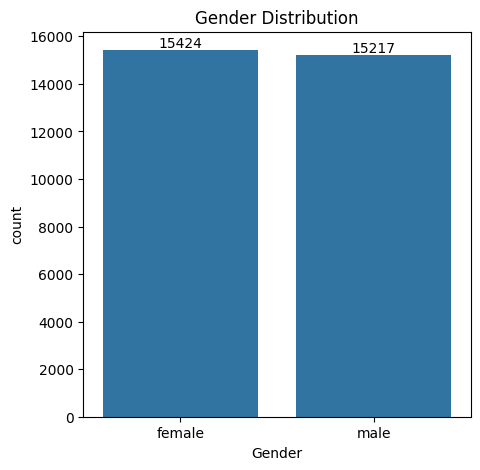

In [35]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=dataframe,x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

 from the graph we have concluded that number of females are more than number of males

In [28]:
gb = dataframe.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


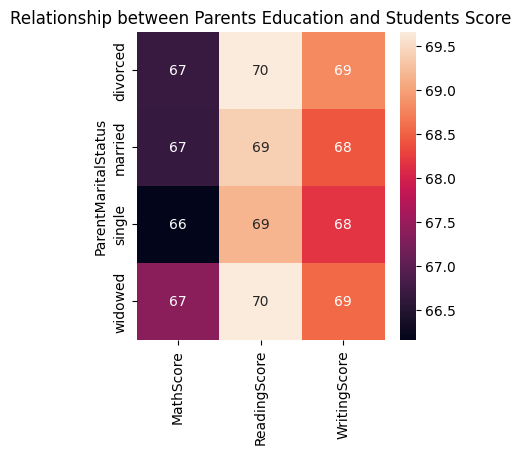

In [37]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parents Education and Students Score")
plt.show()

from the above chart we concluded that education of parents impacted on students 

In [38]:
gb = dataframe.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


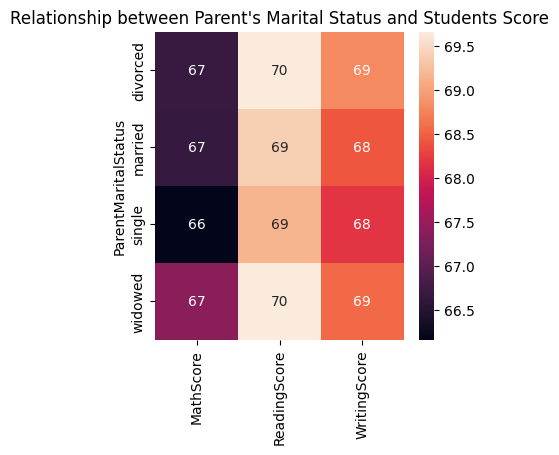

In [39]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Marital Status and Students Score")
plt.show()

From above graph we concluded that there is no impact of ParentMaritalStatus on students because there is no higher difference betwee there scores

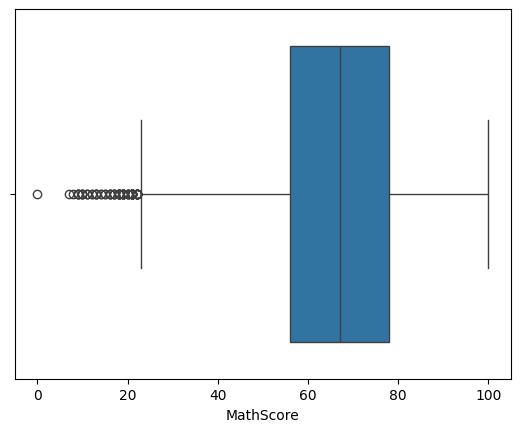

In [41]:
sns.boxplot(data=dataframe,x='MathScore')
plt.show()

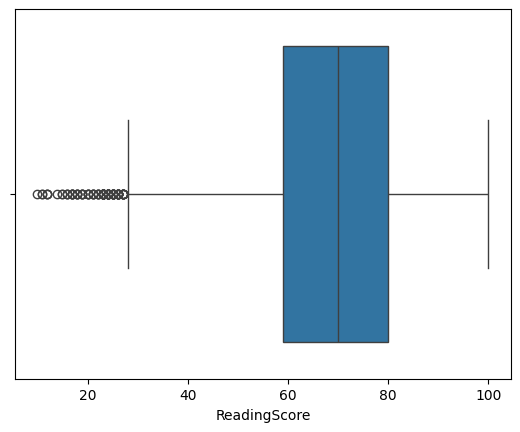

In [43]:
sns.boxplot(data=dataframe,x='ReadingScore')
plt.show()

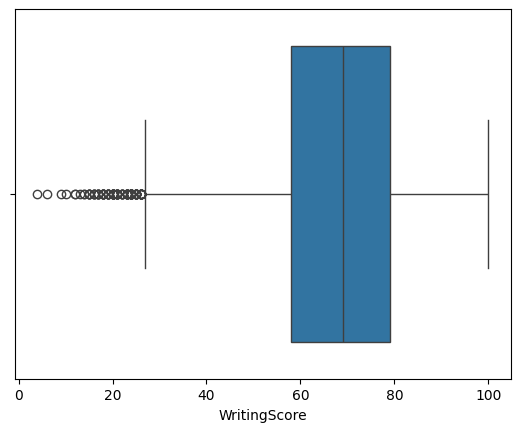

In [44]:
sns.boxplot(data=dataframe,x='WritingScore')
plt.show()

In [46]:
print(dataframe["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


Distribution of Ethinic Groups

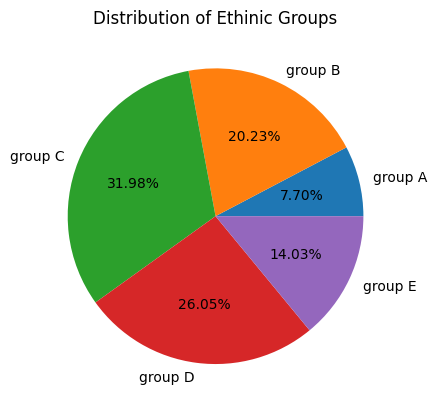

In [58]:
groupA = dataframe.loc[(dataframe['EthnicGroup'] == 'group A')].count()
groupB = dataframe.loc[(dataframe['EthnicGroup'] == 'group B')].count()
groupC = dataframe.loc[(dataframe['EthnicGroup'] == 'group C')].count()
groupD = dataframe.loc[(dataframe['EthnicGroup'] == 'group D')].count()
groupE = dataframe.loc[(dataframe['EthnicGroup'] == 'group E')].count()
#print(groupA['EthnicGroup'])
#print(groupA)
mylist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mylist,labels=["group A","group B","group C","group D","group E"],autopct="%1.2f%%")
plt.title("Distribution of Ethinic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

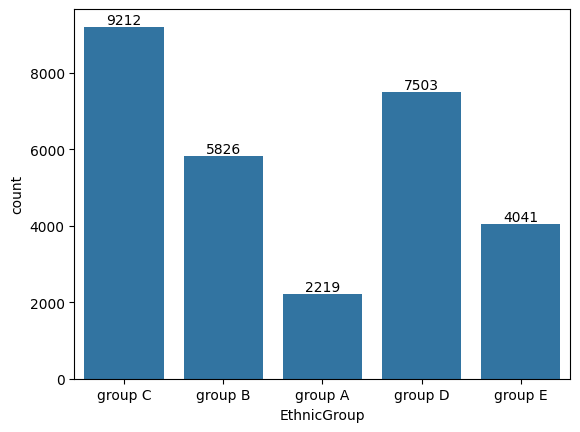

In [59]:
ax=sns.countplot(data=dataframe,x='EthnicGroup')
ax.bar_label(ax.containers[0])